In [5]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.metrics.pairwise import cosine_similarity

# Warning
import warnings
warnings.filterwarnings("ignore")

In [6]:
import importlib

def import_or_install(package, package_name):
    """
    Tries to import the package. If not installed, installs it via pip.
    """
    try:
        importlib.import_module(package)
        print(f"{package_name} is already installed.")
    except ImportError:
        print(f"{package_name} is not installed. Installing...")
        !pip install {package}
        print(f"{package_name} has been installed successfully.")

# List of packages to import/install
packages = {
    "pandas": "Pandas",
    "numpy": "NumPy",
    "seaborn": "Seaborn",
    "matplotlib": "Matplotlib",
    "sklearn.model_selection": "Scikit-learn (Model Selection)",
    "sklearn.preprocessing": "Scikit-learn (Preprocessing)",
    "statsmodels.tsa.seasonal": "Statsmodels (Time Series Analysis)",
    "sklearn.cluster": "Scikit-learn (Clustering)",
    "mlxtend.frequent_patterns": "MLxtend (Frequent Patterns)",
    "sklearn.metrics.pairwise": "Scikit-learn (Metrics)",
    "warnings": "Warnings"
}

# Import or install each package
for package, package_name in packages.items():
    import_or_install(package, package_name)

# Additional configuration
import warnings
warnings.filterwarnings("ignore")


Pandas is already installed.
NumPy is already installed.
Seaborn is already installed.
Matplotlib is already installed.
Scikit-learn (Model Selection) is already installed.
Scikit-learn (Preprocessing) is already installed.
Statsmodels (Time Series Analysis) is already installed.
Scikit-learn (Clustering) is already installed.
MLxtend (Frequent Patterns) is already installed.
Scikit-learn (Metrics) is already installed.
Warnings is already installed.


In [9]:
#importing data
data=pd.read_csv('superstoredata.csv')

In [10]:
#using to display first 10 columns in data
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,54.08


In [13]:
# to get info of the data understanding structure so it helps
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Sales        541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [18]:
# to get some insights
print(data.describe())

            Quantity      UnitPrice     CustomerID          Sales
count  541909.000000  541909.000000  406829.000000  541909.000000
mean        9.552250       4.611114   15287.690570      17.987795
std       218.081158      96.759853    1713.600303     378.810824
min    -80995.000000  -11062.060000   12346.000000 -168469.600000
25%         1.000000       1.250000   13953.000000       3.400000
50%         3.000000       2.080000   15152.000000       9.750000
75%        10.000000       4.130000   16791.000000      17.400000
max     80995.000000   38970.000000   18287.000000  168469.600000


there are some Minimum value in minus too which ae in quantity. 

In [20]:
# lets find Unique data in datset. thia will provide us with total number of unique customers and  country 
unique= data.nunique()
print(unique)

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
Sales           5998
dtype: int64


array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

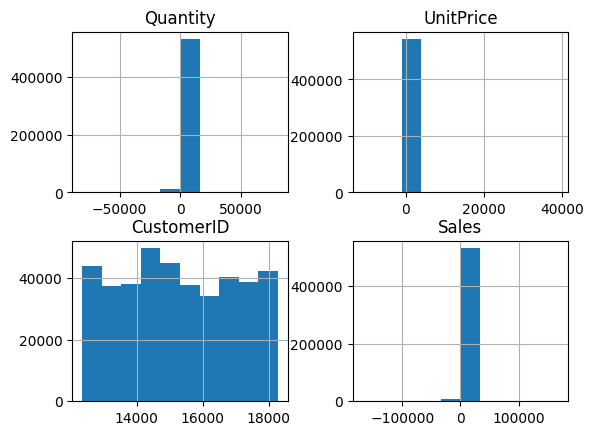

In [21]:
data.hist()

DATA PREPROCESSING:
now that we know basic informTION OF DATA

In [23]:
data1=data.copy()
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

Handling NULLVALUES

In [24]:
data['CustomerID']=data['CustomerID'].fillna(9999)
data['Description']=data['Description'].fillna('Unknown value')

In [25]:
#filtering a  data to include only the rows where the values in the 'Sales' column are greater than 0.
data=data[data['Sales']>0]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   530104 non-null  float64       
 7   Country      530104 non-null  object        
 8   Sales        530104 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.4+ MB


In [27]:
num=['Quantity','UnitPrice','CustomerID','Sales']
char=['Country']